In [ ]:
# doubts for the doubt clarification session
# 1. what is the target column?
# 2. what is the order values?
# 3. how do i differentiate between the items the customer viewed and the order they actually made?

In [15]:
# import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("D:\\GIT HUB\\GUVI Mini Proj 4\\train_data - train_data.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132379 entries, 0 to 132378
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   year                  132379 non-null  int64 
 1   month                 132379 non-null  int64 
 2   day                   132379 non-null  int64 
 3   order                 132379 non-null  int64 
 4   country               132379 non-null  int64 
 5   session_id            132379 non-null  int64 
 6   page1_main_category   132379 non-null  int64 
 7   page2_clothing_model  132379 non-null  object
 8   colour                132379 non-null  int64 
 9   location              132379 non-null  int64 
 10  model_photography     132379 non-null  int64 
 11  price                 132379 non-null  int64 
 12  price_2               132379 non-null  int64 
 13  page                  132379 non-null  int64 
dtypes: int64(13), object(1)
memory usage: 14.1+ MB


In [5]:
data.head()

,year,month,day,order,country,session_id,page1_main_category,page2_clothing_model,colour,location,model_photography,price,price_2,page
0,2008,6,22,21,29,15648,3,C20,13,1,2,48,1,2
1,2008,5,19,6,29,10018,2,B26,13,3,1,57,1,2
2,2008,7,15,2,29,19388,3,C13,9,5,1,48,1,1
3,2008,5,2,2,29,7181,2,B11,2,4,1,43,2,1
4,2008,6,9,16,29,13493,2,B31,9,5,1,57,1,2


In [ ]:
# key insights that we can find from the given data:
# 1.relationship of each column with the target column - price amd price 2 -- target column will be discussed in the doubt clarification session
# doubt clarification session - 22nd oct
# 2.Time series - more/ number of clicks per session ; which country bought the most on which; 
# how many session per d, m; most revenue generated d,m, sessions and the clicks made;
# most purchased model, most visited model, - days and months and weeks
# 3.which part of the screen is 1st viewed/clicked, which part of the screen is most clicked, 
# which part of the screen is last clicked ; which page captured the most and least (h/l value) - for high valued orders, low valued orders
# 4.which country bouth which, which coloru, - category and model
# 5.which position of the page is clicked most - per page ; which page generate more revenue.
# 6.visualize which item is showed on which page and minimum clicks required to view the particular iteam - how much click it actually took to view the item 
# which generated move revenue ? most clicked or least clicked sessions? which model is popular and does the poplur item is priced above or below average? 
# what model did the user see before buying the item

#Statistical graphs and interfrence:
# distribution graphs -
# Hpotheysis testing
# Colinearity 
# co-relation heat map
# skewness and kurtosis
# outliers and anamoly detections
# 

#column types:
# Category: 
# page2_clothing_model
# page1_main_category
# colour
# location
# country	
# model_photography
# price_2
# page - it is continuous but just consider it as category for interpretation sake

# Continuous:
# page
# price
# order

# Time series:
# month
# day

# constant:
# year

# uniques:

# Target (dependent):

 




In [ ]:
# distribution graphs

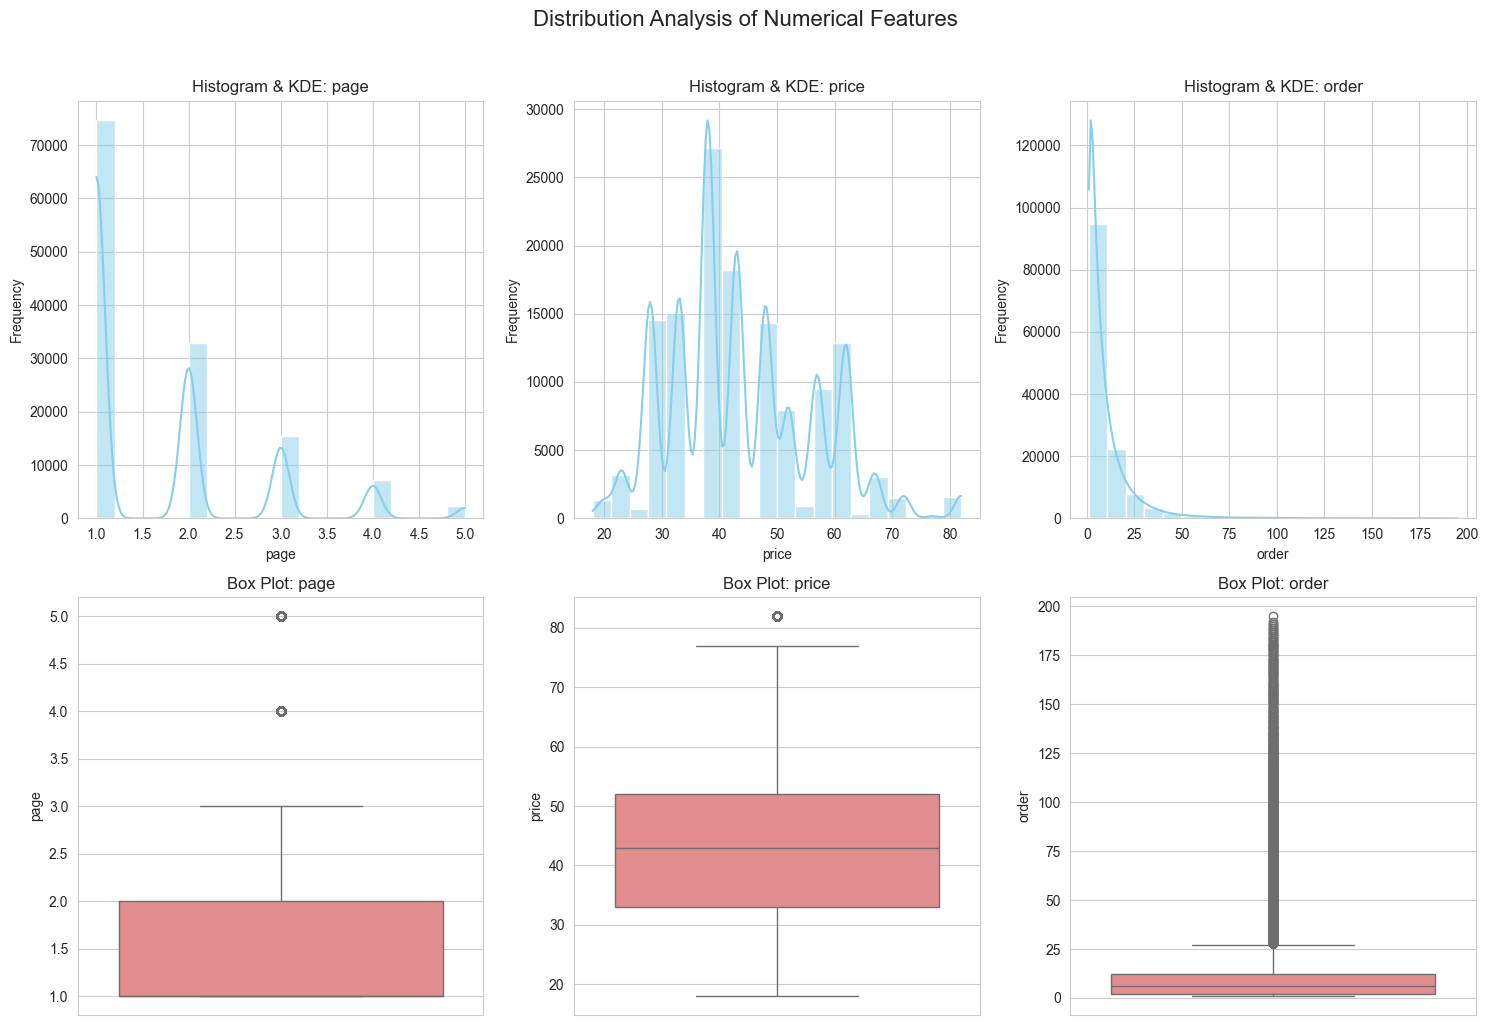

In [16]:
# List of numerical columns to plot (replace with your actual column names)
numerical_features = ['page', 'price','order']

# Set a style for the plots
sns.set_style("whitegrid")

# Create a figure and a set of subplots
plt.figure(figsize=(15, 10))
plt.suptitle('Distribution Analysis of Numerical Features', fontsize=16, y=1.02)

for i, col in enumerate(numerical_features):
    # Calculate subplot position (2 rows, 3 columns)
    
    # ------------------
    # HISTOGRAM (Row 1) - Shows the frequency/shape of the data
    # ------------------
    plt.subplot(2, len(numerical_features), i + 1)
    # The 'kde=True' overlay provides a smooth density estimate
    sns.histplot(data[col], kde=True, bins=20, color='skyblue')
    plt.title(f'Histogram & KDE: {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # ------------------
    # BOX PLOT (Row 2) - Shows the 5-number summary and outliers
    # ------------------
    plt.subplot(2, len(numerical_features), i + 1 + len(numerical_features))
    sns.boxplot(y=data[col], color='lightcoral')
    plt.title(f'Box Plot: {col}')
    plt.ylabel(col)

# Adjust layout to prevent overlap and display the plots
plt.tight_layout()
plt.show()

In [14]:
data['page'].max()

np.int64(5)

In [6]:
# data.duplicated().sum()
data.nunique()
#suma test
# data.isnull().sum()

year                        1
month                       5
day                        31
order                     193
country                    46
session_id              22910
page1_main_category         4
page2_clothing_model      216
colour                     14
location                    6
model_photography           2
price                      20
price_2                     2
page                        5
dtype: int64

In [7]:
# data['page2_clothing_model'].value_counts()
# data['order'].max()
data['price'].max()

np.int64(82)

In [8]:
data['month'].value_counts()

month
4    38664
5    28572
7    28032
6    25794
8    11317
Name: count, dtype: int64

In [9]:
#identifying the clothing models that are above priced above average and below
df_cat = data[['page2_clothing_model','price_2']]

temp_count = df_cat['page2_clothing_model'].value_counts()
# temp_count
df_cat['visit_count'] = df_cat['page2_clothing_model'].map(temp_count)
df_cat.drop_duplicates(inplace=True)
df_cat.info()




<class 'pandas.core.frame.DataFrame'>
Index: 216 entries, 0 to 110324
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   page2_clothing_model  216 non-null    object
 1   price_2               216 non-null    int64 
 2   visit_count           216 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 6.8+ KB


C:\Users\Hp\AppData\Local\Temp\ipykernel_18888\1162881264.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat['visit_count'] = df_cat['page2_clothing_model'].map(temp_count)
C:\Users\Hp\AppData\Local\Temp\ipykernel_18888\1162881264.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat.drop_duplicates(inplace=True)


In [13]:
df_cat.sort_values(by='visit_count', ascending=False).head()

,page2_clothing_model,price_2,visit_count
116,B4,1,2824
21,A2,2,2389
9,A11,1,2247
15,P1,1,2134
46,B10,1,2011


In [ ]:
#Data understanding - observation
#no duplicates
#no null
#page2_clothing_model -only object type - rest all int
#Encoding required for : page2_clothing_model 




In [ ]:
# will be using target encoding and frequency encoding for the page2_clothng_model column - refer one note